Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (94896

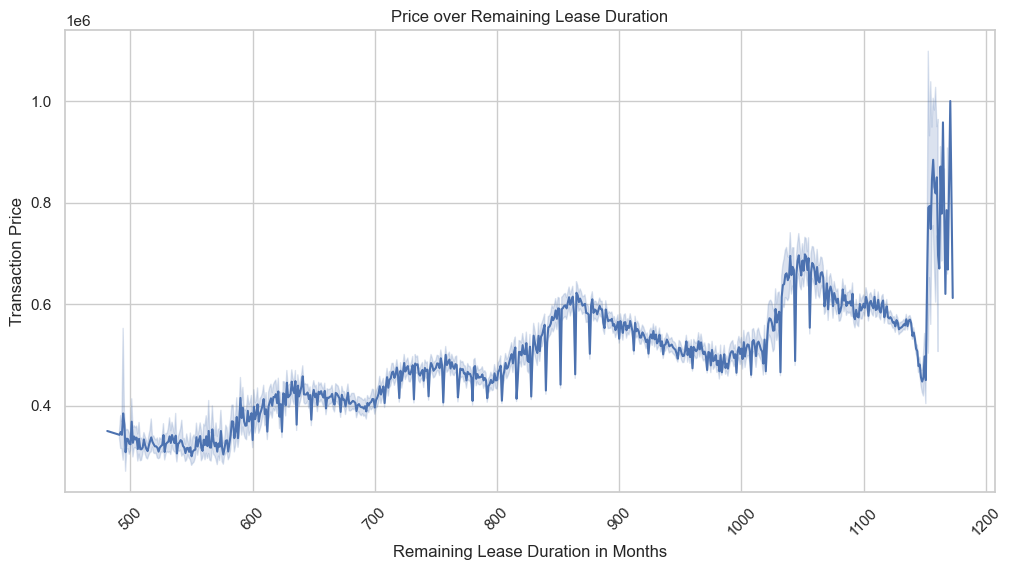

Number of entries with remaining_lease_derived attribute: 948962


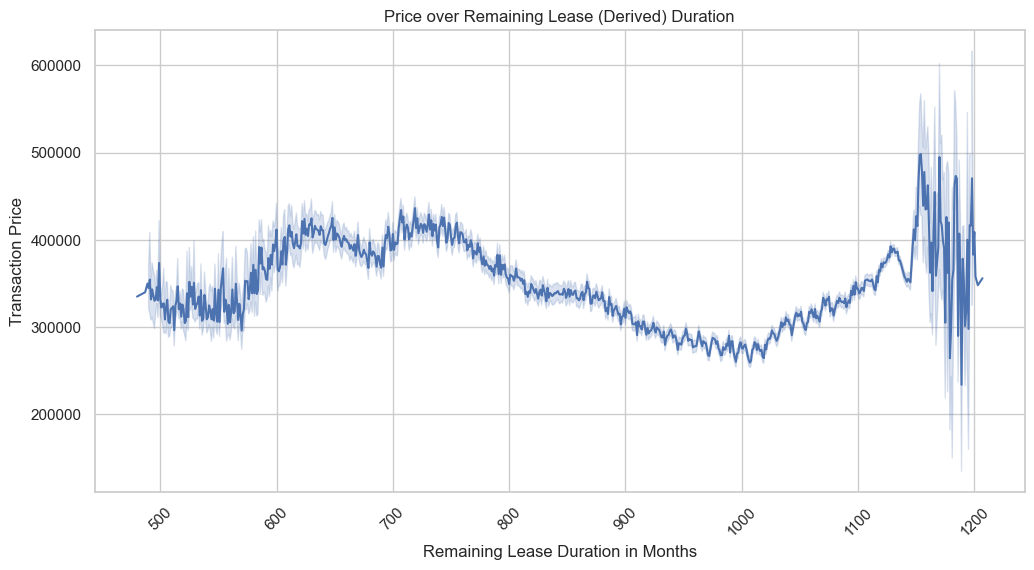

In [ ]:
# Analysis of correlation between number of transactions and price

from lib.utils import load_all_resale_data, get_cleaned_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Load data with transaction date features
X, y = load_all_resale_data(include_features=['remaining_lease', 'month', 'lease_commence_date'])
print(f"Number of entries in dataset: {X.shape[0]}")

df2 = X.copy(deep = True)

X = X.dropna(subset=['remaining_lease'])
X['remaining_lease'] = X['remaining_lease'].apply(parse_duration)
def parse_duration(duration_str):
    if isinstance(duration_str, str):
        match = re.match(r"(?:(\d+)\s+year[s]?)?\s*(?:(\d+)\s+month[s]?)?", duration_str)
        if match:
            years = int(match.group(1)) if match.group(1) else 0
            months = int(match.group(2)) if match.group(2) else 0
            return years * 12 + months
    return duration_str * 12

df = X
df['price'] = y
df = df.dropna(subset=['remaining_lease'])

print(f"Number of entries with remaining_lease attribute: {df.shape[0]}")
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df, x='remaining_lease', y='price')
plt.title('Price over Remaining Lease Duration')
plt.xlabel('Remaining Lease Duration in Months')
plt.ylabel('Transaction Price')
plt.xticks(rotation=45)
plt.show()


df2['price'] = y
df2["total_months_since_start"] = pd.to_datetime(df2["month"]).dt.year * 12 + df2['month'].dt.month - df2["lease_commence_date"] * 12
df2['remaining_lease_derived'] = 99 * 12 - (df2["total_months_since_start"] )
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
print(f"Number of entries with remaining_lease_derived attribute: {df2.shape[0]}")
sns.lineplot(data=df2, x='remaining_lease_derived', y='price')
plt.title('Price over Remaining Lease (Derived) Duration')
plt.xlabel('Remaining Lease Duration in Months')
plt.ylabel('Transaction Price')
plt.xticks(rotation=45)
plt.show()




There exists a strong correlation between the remaining lease duration in months and the transaction price. However, the remaining_lease attribute only exists in 25% of entries. We can derive this attribute for all entries by subtracting the age of the unit, given by the month (transaction date) - lease_commence_date, from 99 (or 99 * 12 if the duration is in months). However, the derived attribute no longer demonstrates a linear relationship, which suggests a higher order polynomial model may be the best fit.